# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [198]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import scipy.stats as stats
%matplotlib inline

### Step 2: Read in your data set 

In [172]:
#Read in data from source 
df = pd.read_csv("..//assets//admissions.csv")
print(df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [173]:
df.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

In [174]:
df.shape

(400, 4)

There are 400 oberservations in the df data set and 3 null values. 

In [146]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Data Dictionary

FieldName|Type|Description
---------|----|-----------
admit|integer (0 or 1)|o = was admitted into the school; 1 = was not admitted
gre|float|Score of applicant on the GRE
gpa|float|Applicant's GPA
prestige|integer (1,2,3,4)| The prestige of the applicant's school

#### Question 2. Create a summary table

In [147]:
#Some sweet sweet decrip statties. 
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

GRE has a larger STD than GPA because it has a larger range. GRE ranges from 220 to 800 whereas GPA ranges from 2.26 to 4.0. Additionally, GPA may be clustered closer to the mean due to it's nature as an average of dozens of classes wheras the GRE is a single exam. 

#### Question 4. Drop data points with missing data


In [148]:
df.copy = df.dropna(axis=0, how='any')

In [149]:
df.copy.shape

(397, 4)

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [150]:
# by looking at the count of the new dataframe and 
#see's if it's now the same count across dimensions.
df.copy.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

#### Question 6. Create box plots for GRE and GPA

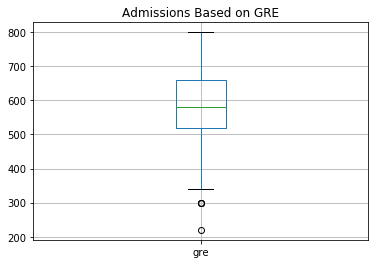

In [151]:
#boxplot 1 - GRE
df.copy.boxplot('gre')
plt.title("Admissions Based on GRE")

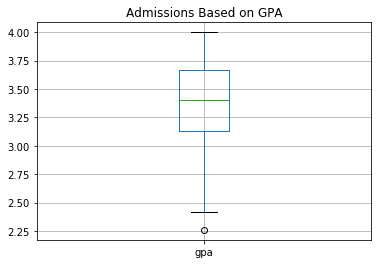

In [152]:
#boxplot 2 - GPA
df.copy.boxplot('gpa')
plt.title("Admissions Based on GPA")

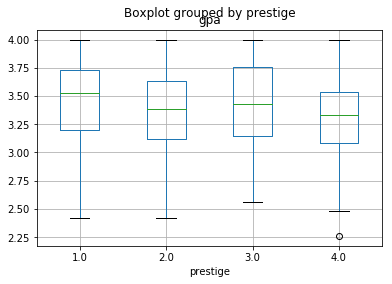

In [153]:
#Messing around with boxplots
df.copy.boxplot(column='gpa', by='prestige')

#### Question 7. What do these plots show?

These box plots show the shape of the distribution of scores, their central value and it's variability. Box Plot 1 (GRE) is comparatively short and evently distrubted, with two outliers. Box Plot 2 (GPA) is skewed, indicated by it's long lower whisker. 

#### Question 8. Describe each distribution 

admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: gre, dtype: object

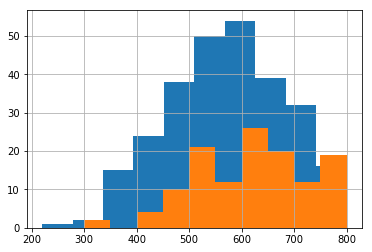

In [154]:
#plotting the distribution of GRE with a histrogram
df.copy.groupby('admit').gre.hist()

admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: gpa, dtype: object

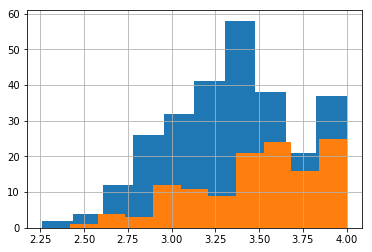

In [155]:
#Plotting the distribution of GPA with a histogram
df.copy.groupby('admit').gpa.hist()

admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: prestige, dtype: object

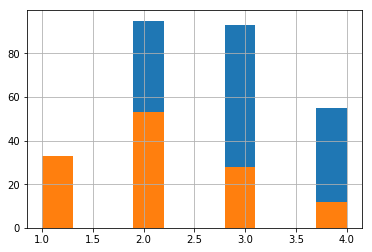

In [156]:
#Plotting the distribution of Prestige with a histogram
df.copy.groupby('admit').prestige.hist()

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

No, we would not meet the assumption of a normal distribution. Both GRE and GPA are left skewed. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Yes, if we want to preform statistical tests or model the data, the distribution will need to be normal. To do that, we should be able to use the box-cox method with this particular data set. 

#### Question 11. Which of our variables are potentially colinear? 

In [157]:
# create a correlation matrix for the data
df.copy.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


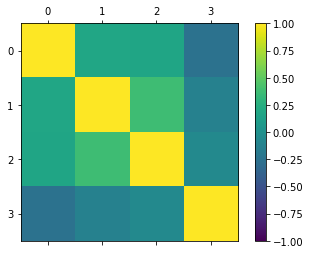

In [158]:
correlation = df.copy.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
plt.show()

#### Question 12. What did you find?

GRE and GPA are potentially colinear because they have a correlation statistic of .38, the strongest of any other combination of variables. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

**Step 1:** Using <i>df.copy(corr)</i> look at the correlation coefficent between admit and prestige <br>
**Step 2:** Plot the distribution of admit and prestige <br>
**Step 3:** Conduct a chi-squared test using scipy.stats to attempt rejection of hte null hypothesis that the data are indendent. 

#### Question 14. What is your hypothesis? 

Null Hypothesis: There is no correlation between admission and prestige. <br>
Alternative Hypothesis: There is a correlation between admission and prestige. 

I suspect that we will reject the null and there may be a correlation between admission and prestige. Based of common knowledge and some distributions from above, I'd suspect that there is a correlation between admission and more prestigious schools.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data


Let's make admissions 2 from the original data frame to mess around with. 

In [191]:
admissions2 = df

Let's replace null values with their respective median values which is more robust to outliers than the mean. We could replace "median" with "mean" below if we really wanted to use the mean value. 

In [196]:
admissions2['gre'].fillna((admissions2['gre'].median()), inplace=True)
admissions2['gpa'].fillna((admissions2['gpa'].median()), inplace=True)
admissions2['prestige'].fillna((admissions2['prestige'].median()), inplace=True)

Checking to make sure our new data frame has been properly filled.

In [195]:
admissions2.count()

admit       400
gre         400
gpa         400
prestige    400
dtype: int64

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data